# DSE 207R FINAL PROJECT
## Fall 2024
### Due Date:  December 8th, 2024
### Late Due Date:  December 10th, 2024

The final project is a guided project for you to build your own end-to-end analysis using Python, especially using what you learned on Python _numpy_, _pandas_, _matplotlib_/_seaborn_ and _scilitlearn_ libraries.

This project is culmination of all you’ve learned in this course! You should expect to spend <b>24-32 total hours</b> on the project. Be sure to read all of the items below before starting. Make sure to follow Piazza for any updates on the final project.

# <b>Deliverables</b>:
The final project has 2 submissions - a report (this notebook) and an presentation video (self recorded). You will be evaluated on both the components.

## 1. Report (this notebook)
Submit the notebook via Gradescope by midnight on the due date above along with clear instructions on how to download the datasets you used for and reproduce your results. You can host the dataset (on GitHub) such that it can be used as a URL directly. Don't forget to add your name on top as the author of the notebook.



There are a number of steps outlined below, but is critical that you do not view this as an entirely linear process.  Remember that the science component in data science is the creation of a hypothesis based on exploration and testing of that hypothesis through analysis.  You may need to go through many of these steps multiple times before you arrive at meaningful hypothesis or conclusions.

### Step 1: Find a dataset or datasets

1.1. **Based on your interest, identify a dataset which you will want to examine.**  You will find a starting point for where you can find open datasets at the end of this notebook, but feel free to use other datasets you have access to and can publicly share results about.


This step may take some time, as you’ll likely look at a number of datasets before you find one (or more) which holds promising data for the kinds of questions you want to ask.

Below are some resources but you are not limited to them -

UCI's Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets.php <br>
Kaggle: https://www.kaggle.com/datasets <br>
KDnuggets Dataset: http://www.kdnuggets.com/datasets/index.html <br>
government data (http://www.kdnuggets.com/datasets/government-local-public.html) <br>
Data APIs (http://www.kdnuggets.com/datasets/api-hub-marketplace-platform.html <br>
Data Mining Competitions (http://www.kdnuggets.com/competitions/index.html <br>
US Government Data: https://www.data.gov/ <br>
UK Government Data: https://data.gov.uk/ <br>
Canada's Open Data Exchange: https://codx.ca/ <br>
World Health Organization: http://www.who.int/gho/en <br>
World Bank: http://data.worldbank.org/ <br>

Remember! Finding a dataset of interest and exploring it is most of your job for your final project. So expect this to take some time - and that's both perfectly normal and completely okay. Get started early and make sure to check if the dataset you find satisfies the project requirements.
<br>

<br>

1.2. **Once selected, explain the choice of dataset and why you want to work with it.**

Christopher Spears 

I chose this dataset becuase it is deals with finacial data and is very interesting. It is a competition that Jane Street is hosting on Kaggle and it consists of anonymized market data. The objective is to predict responder 6 using the feeatures. There is also a prize associated which is cool! I have also never worked with parquet file which means I have learned a great deal. I find this very interesting. ubmissions are evaluated on a scoring function defined as the sample weighted zero-mean R-squared score. So all of my research will be based on that. I plan to continue this project as well! 

In [1]:
# !pip install dask

In [2]:
# !pip install pyarrow

In [3]:
import pandas as pd

In [4]:
#EXPLAIN AND INGEST YOUR DATASET IN THIS SECTION

NameError: name 'date_id' is not defined

In [5]:
# Define file paths for the Parquet files
base_path = "jane-street-real-time-market-data-forecasting/train.parquet/"
partitions = [f"{base_path}/partition_id={i}/part-0.parquet" for i in range(10)]

# Load all partitions
try:
    data = pd.concat([pd.read_parquet(part) for part in partitions], axis=0)
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Quick summary of the dataset
print('------info-------')
print(data.info())
print('---------head-------')
print(data.head())

# Check for missing values
missing_summary = data.isnull().sum()
print("Missing Values Summary:")
print(missing_summary[missing_summary > 0])

Dataset loaded successfully.
------info-------
<class 'pandas.core.frame.DataFrame'>
Index: 47127338 entries, 0 to 6274575
Data columns (total 92 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date_id      int16  
 1   time_id      int16  
 2   symbol_id    int8   
 3   weight       float32
 4   feature_00   float32
 5   feature_01   float32
 6   feature_02   float32
 7   feature_03   float32
 8   feature_04   float32
 9   feature_05   float32
 10  feature_06   float32
 11  feature_07   float32
 12  feature_08   float32
 13  feature_09   int8   
 14  feature_10   int8   
 15  feature_11   int16  
 16  feature_12   float32
 17  feature_13   float32
 18  feature_14   float32
 19  feature_15   float32
 20  feature_16   float32
 21  feature_17   float32
 22  feature_18   float32
 23  feature_19   float32
 24  feature_20   float32
 25  feature_21   float32
 26  feature_22   float32
 27  feature_23   float32
 28  feature_24   float32
 29  feature_25   float32
 30  feature

In [6]:
chunk_size = 1_000_000  # Process 1 million rows at a time
missing_ratios = []

# Define a function to compute missing ratios in chunks
def compute_missing_ratios(df):
    return df.isnull().mean()

# Iterate through partitions
for part in partitions:
    chunk = pd.read_parquet(part)
    missing_ratios.append(compute_missing_ratios(chunk))

# Combine missing ratios and compute the mean across chunks
global_missing_ratios = pd.concat(missing_ratios, axis=1).mean(axis=1)

# Drop columns with high missing ratios
threshold = 0.5
columns_to_keep = global_missing_ratios[global_missing_ratios < threshold].index
print(f"Keeping columns: {columns_to_keep}")


Keeping columns: Index(['date_id', 'time_id', 'symbol_id', 'weight', 'feature_00', 'feature_01',
       'feature_02', 'feature_03', 'feature_04', 'feature_05', 'feature_06',
       'feature_07', 'feature_08', 'feature_09', 'feature_10', 'feature_11',
       'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16',
       'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21',
       'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26',
       'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31',
       'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36',
       'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41',
       'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46',
       'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51',
       'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56',
       'feature_57', 'feature_58', 'feature_59', 'featur

In [6]:
import dask.dataframe as dd

# Load dataset with Dask
data = dd.read_parquet(base_path + "partition_id=*/part-0.parquet")

# Compute missing ratios
missing_ratios = data.isnull().mean().compute()

# Drop columns with more than 50% missing values
columns_to_keep = missing_ratios[missing_ratios < 0.5].index
columns_to_lose = missing_ratios[missing_ratios > 0.5].index
print(len(columns_to_lose))
data = data[columns_to_keep]
print('-----head data--------')
print(data.head())  # View a sample


0
-----head data--------
   date_id  time_id  symbol_id    weight  feature_00  feature_01  feature_02  \
0        0        0          1  3.889038         NaN         NaN         NaN   
1        0        0          7  1.370613         NaN         NaN         NaN   
2        0        0          9  2.285698         NaN         NaN         NaN   
3        0        0         10  0.690606         NaN         NaN         NaN   
4        0        0         14  0.440570         NaN         NaN         NaN   

   feature_03  feature_04  feature_05  ...  responder_0  responder_1  \
0         NaN         NaN    0.851033  ...     0.738489    -0.069556   
1         NaN         NaN    0.676961  ...     2.965889     1.190077   
2         NaN         NaN    1.056285  ...    -0.864488    -0.280303   
3         NaN         NaN    1.139366  ...     0.408499     0.223992   
4         NaN         NaN    0.955200  ...    -0.373387    -0.502764   

   responder_2  responder_3  responder_4  responder_5  respon

In [9]:
# Print the first row\
print('----------first row------')
print(data.iloc[:,0])
print('---------------10th row----------')
# Print a specific row by index
print(data.iloc[:,10])  # 10th row


----------first row------
Dask Series Structure:
npartitions=89
    int16
      ...
    ...  
      ...
      ...
Name: date_id, dtype: int16
Dask Name: getitem, 3 graph layers
---------------10th row----------
Dask Series Structure:
npartitions=89
    float32
        ...
     ...   
        ...
        ...
Name: feature_06, dtype: float32
Dask Name: getitem, 3 graph layers


In [10]:
# Get the number of rows in the dataset
row_count = data.shape[0].compute()

# Calculate the fraction needed to sample approximately 1 million rows
frac = 1_000_000 / row_count

# Sample the dataset
sample_data = data.sample(frac=frac, random_state=42).compute()

# Check missing data in the sample
missing_summary = sample_data.isnull().mean()
print(missing_summary)



date_id         0.000000
time_id         0.000000
symbol_id       0.000000
weight          0.000000
feature_00      0.067441
                  ...   
responder_5     0.000000
responder_6     0.000000
responder_7     0.000000
responder_8     0.000000
partition_id    0.000000
Length: 93, dtype: float64


In [ ]:
# Check missing values for specific columns
columns_to_check = ['weight'] + [col for col in data.columns if col.startswith('responder')]

# Iterate through columns and compute missing ratios
for col in columns_to_check:
    missing_ratio = data[col].isnull().mean().compute() * 100  # Compute explicitly
    print(f"{col} missing ratio: {missing_ratio:.2f}%")



### Step 2: Explore the datasets

In this step, you should explore what is present in the data and how the data is organized.

You are expected to answer the following questions using the _pandas_ library and markdown cells to describe your actions:

* Are there quality issues in the dataset (noisy, missing data, etc.)?
* What will you need to do to clean and/or transform the raw data for analysis?

You can also visually explore the datasets and explain your findings, specifically,

* How are the data distributed?
* What are some common trends?

In [ ]:
#PERFORM AND EXPLAIN YOUR EXPLORATORY ANALYSIS IN THIS SECTION

### Step 3:  Identify 3 research questions and perform analysis

Now that you have a better understanding of the data, you will want to form a research question which is interesting to you. The research question should be broad enough to be of interest to a reader but narrow enough that the question can be answered with the data.  Some examples:

* __Too Narrow:__  What is the GDP of the U.S. for 2011?  This is just asking for a fact or a single data point.  

* __Too Broad:__  What is the primary reason for global poverty?  This could be a Ph.D. thesis and would still be way too broad.  What data will you use to answer this question?  Even if a single dataset offered an answer, would it be defendable given the variety of datasets out there?

* __Good:__  Can you use simple sentiment analysis on comments about movies in a movie database to predict its box office earnings?  If you have, or can obtain, data on a variety of movies and you have their box office earnings, this is a question which you can potentially answer well.

__Remember__, this course is for learning Python. You will not be graded on the complexity, accuracy or performance of your analytical methods. However, you are expected to use a Python library, e.g., _scikitlearn_, successfully to generate results and explain why you picked the methods you used.

Some points to note :
1. Make sure that the 3 questions are distinct in terms of the kind of insight provided. For eg. avoid having 3 questions for correlation that only differ by the fields used.
2. You can reach out to the professor or TA to seek feedback on your questions.



In [ ]:
#OVERVIEW YOUR QUESTION AND PERFORM YOUR ANALYSIS IN THIS SECTION

Question 1.): Which features are most important in predicting responder_6, and how do these features contribute to the model's performance in a financial dataset?

Weighted R² Score: -0.12267715498829546
Top 10 Features for Responder_6:
       Feature  Importance
63  feature_60    0.020888
61  feature_58    0.020737
8   feature_05    0.019334
9   feature_06    0.018824
1      time_id    0.018156
62  feature_59    0.017729
36  feature_33    0.017356
50  feature_47    0.017080
11  feature_08    0.016869
7   feature_04    0.016789


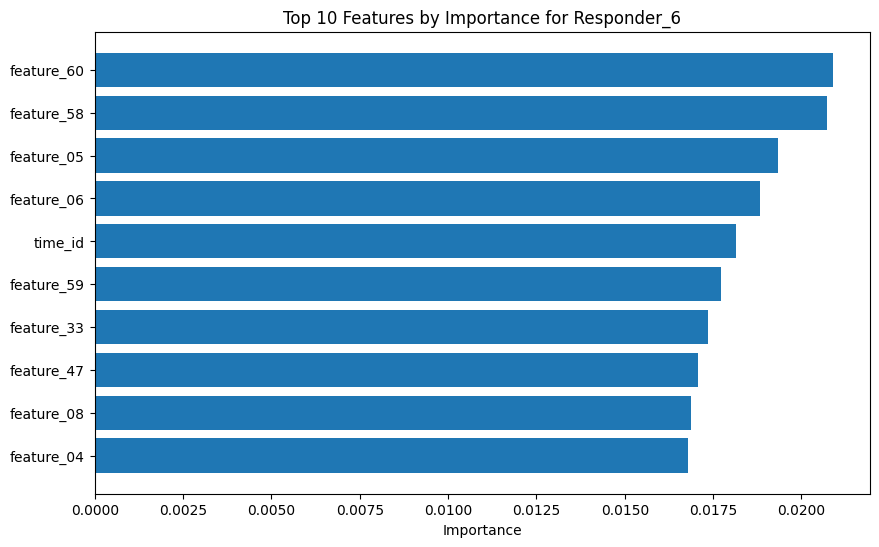

In [13]:
# question 1 with weights 
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define features and target
X = sample_data.drop(columns=[col for col in sample_data.columns if col.startswith("responder") or col == "weight"])
y = sample_data["responder_6"]
weights = sample_data["weight"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)

# Reduce dataset size
X_imputed_reset = X_imputed.reset_index(drop=True)
y_reset = y.reset_index(drop=True)
weights_reset = weights.reset_index(drop=True)

sample_size = min(50_000, X_imputed_reset.shape[0])  # Smaller sample size for speed
sample_indices = X_imputed_reset.sample(n=sample_size, random_state=42).index

X_sample = X_imputed_reset.loc[sample_indices]
y_sample = y_reset.loc[sample_indices]
weights_sample = weights_reset.loc[sample_indices]

# Train-Test Split
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X_sample, y_sample, weights_sample, test_size=0.2, random_state=42
)

# Train Random Forest with sample weights
rf = RandomForestRegressor(random_state=42, n_estimators=10, n_jobs=-1)  # Fewer trees
rf.fit(X_train, y_train, sample_weight=w_train)

# Evaluate model performance
def weighted_r2(y_true, y_pred, sample_weight):
    y_true_mean = (y_true * sample_weight).sum() / sample_weight.sum()
    numerator = (sample_weight * (y_true - y_pred) ** 2).sum()
    denominator = (sample_weight * (y_true - y_true_mean) ** 2).sum()
    return 1 - numerator / denominator

y_pred = rf.predict(X_test)
r2 = weighted_r2(y_test, y_pred, w_test)
print(f"Weighted R² Score: {r2}")

# Feature Importance Analysis
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display the top 10 features
print("Top 10 Features for Responder_6:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["Feature"].head(10), feature_importance["Importance"].head(10))
plt.gca().invert_yaxis()
plt.title("Top 10 Features by Importance for Responder_6")
plt.xlabel("Importance")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Handle Missing Values
# Impute missing values using the median
imputer = SimpleImputer(strategy="median")

# Define features (X) and target (y)
X = sample_data.drop(columns=[col for col in sample_data.columns if col.startswith("responder")])
y = sample_data["responder_6"]

# Impute missing values in features
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)

# Step 2: Reduce dataset size for faster training (optional)
# Ensure consistent sampling by resetting indices
X_imputed_reset = X_imputed.reset_index(drop=True)
y_reset = y.reset_index(drop=True)

sample_size = min(100_000, X_imputed_reset.shape[0])  # Adjust sample size if necessary
sample_indices = X_imputed_reset.sample(n=sample_size, random_state=42).index

X_sample = X_imputed_reset.loc[sample_indices]
y_sample = y_reset.loc[sample_indices]

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Step 4: Train a Random Forest Model
# Use fewer estimators and parallel processing for faster training
rf = RandomForestRegressor(random_state=42, n_estimators=50, n_jobs=-1)
rf.fit(X_train, y_train)

# Step 5: Feature Importance Analysis
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display the top 10 features
print("Top 10 Features for Responder_6:")
print(feature_importance.head(10))

# Step 6: Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["Feature"].head(10), feature_importance["Importance"].head(10))
plt.gca().invert_yaxis()
plt.title("Top 10 Features by Importance for Responder_6")
plt.xlabel("Importance")
plt.show()




Question 2.) How do lagged feature values and time-series transformations (e.g., differencing or rolling statistics) impact the predictive accuracy of models forecasting responder_6?

Weighted R² Score on test set: -0.17475437358414725
Top 10 Features for Responder_6 (Lagged Features Included):
           Feature  Importance
0       feature_60    0.184179
1       feature_58    0.181281
2       feature_05    0.169831
5  feature_05_lag1    0.156481
3  feature_60_lag1    0.154209
4  feature_58_lag1    0.154019


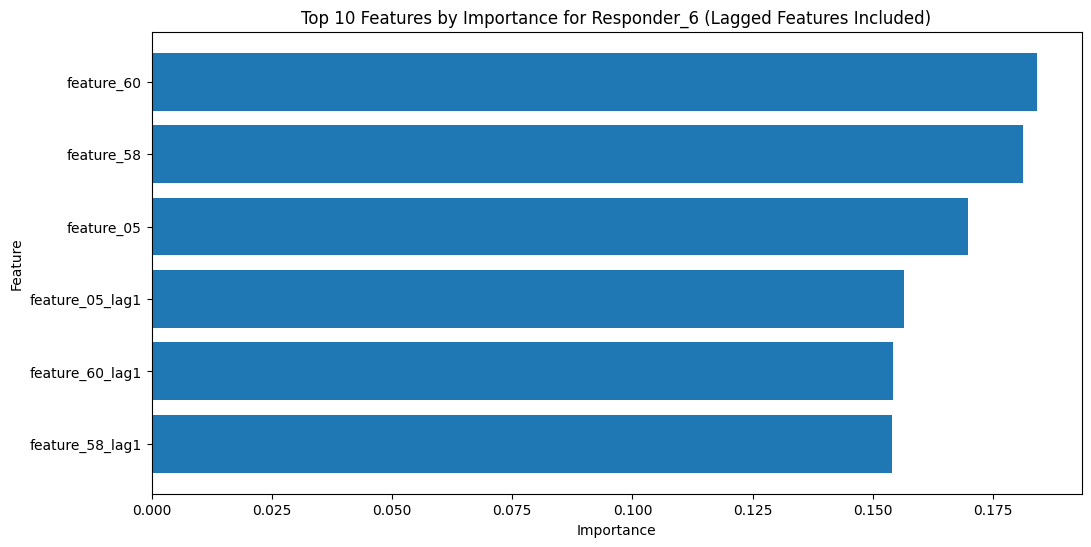

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Question 2: Optimized Code with Weights

# Define filtered_data by selecting relevant columns (ensure target and weights are included)
filtered_data = sample_data.dropna(subset=['responder_6', 'weight'])  # Ensure target and weight have no missing values
columns_to_keep = ['feature_60', 'feature_58', 'feature_05', 'responder_6', 'weight']
filtered_data = filtered_data[columns_to_keep]

# Create lagged features (optimize by reducing lag range)
for lag in range(1, 2):  # Create only one lag
    for col in ['feature_60', 'feature_58', 'feature_05']:
        filtered_data[f"{col}_lag{lag}"] = filtered_data[col].shift(lag)

# Drop rows with NaN after lagging
filtered_data = filtered_data.dropna()

# Reduce dataset size
filtered_data = filtered_data.sample(n=50_000, random_state=42)

# Define features, target, and weights
X = filtered_data.drop(columns=['responder_6', 'weight'])
y = filtered_data['responder_6']
weights = filtered_data['weight']

# Train-test split (include weights for splitting)
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, weights, test_size=0.2, random_state=42
)

# Train a Random Forest model with fewer trees for faster training
rf = RandomForestRegressor(random_state=42, n_estimators=10, n_jobs=-1)  # Reduced n_estimators
rf.fit(X_train, y_train, sample_weight=w_train)

# Evaluate the model using weighted R²
def weighted_r2(y_true, y_pred, sample_weight):
    y_true_mean = (y_true * sample_weight).sum() / sample_weight.sum()
    numerator = ((sample_weight * (y_true - y_pred) ** 2).sum())
    denominator = ((sample_weight * (y_true - y_true_mean) ** 2).sum())
    return 1 - numerator / denominator

y_pred = rf.predict(X_test)
weighted_r2_score = weighted_r2(y_test, y_pred, w_test)
print(f"Weighted R² Score on test set: {weighted_r2_score}")

# Analyze feature importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display the top 10 features
print("Top 10 Features for Responder_6 (Lagged Features Included):")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance["Feature"].head(10), feature_importance["Importance"].head(10))
plt.gca().invert_yaxis()
plt.title("Top 10 Features by Importance for Responder_6 (Lagged Features Included)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()



In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define filtered_data by selecting relevant columns
filtered_data = sample_data.dropna(subset=['responder_6'])  # Ensure target has no missing values
columns_to_keep = ['feature_60', 'feature_59', 'feature_58', 'responder_6']
filtered_data = filtered_data[columns_to_keep]

# Create lagged features
for lag in range(1, 4):  # Create 1, 2, and 3 time-step lags
    for col in ['feature_60', 'feature_59', 'feature_58']:
        filtered_data[f"{col}_lag{lag}"] = filtered_data[col].shift(lag)

# Drop rows with NaN after lagging
filtered_data = filtered_data.dropna()

# Define features and target
X = filtered_data.drop(columns=['responder_6'])
y = filtered_data['responder_6']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestRegressor(random_state=42, n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

# Evaluate the model
r2_score = rf.score(X_test, y_test)
print(f"Model R^2 score on test set: {r2_score}")

# Analyze feature importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance["Feature"].head(10), feature_importance["Importance"].head(10))
plt.gca().invert_yaxis()
plt.title("Top 10 Features by Importance for Responder_6 (Lagged Features Included)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()



Question 3.): What is the optimal combination of features and hyperparameters for maximizing the sample weighted zero-mean R-squared (R²) score when predicting responder_6?

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Hyperparameters: {'regressor__n_estimators': 10, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 1, 'regressor__max_depth': 5}
Best Weighted R² Score: 0.807680983392712
Top 10 Features for Responder_6:
        Feature  Importance
85  responder_3    0.847156
82  responder_0    0.084765
88  responder_7    0.036216
86  responder_4    0.013213
87  responder_5    0.010920
0       date_id    0.003918
89  responder_8    0.001910
25   feature_22    0.000561
45   feature_42    0.000281
44   feature_41    0.000274


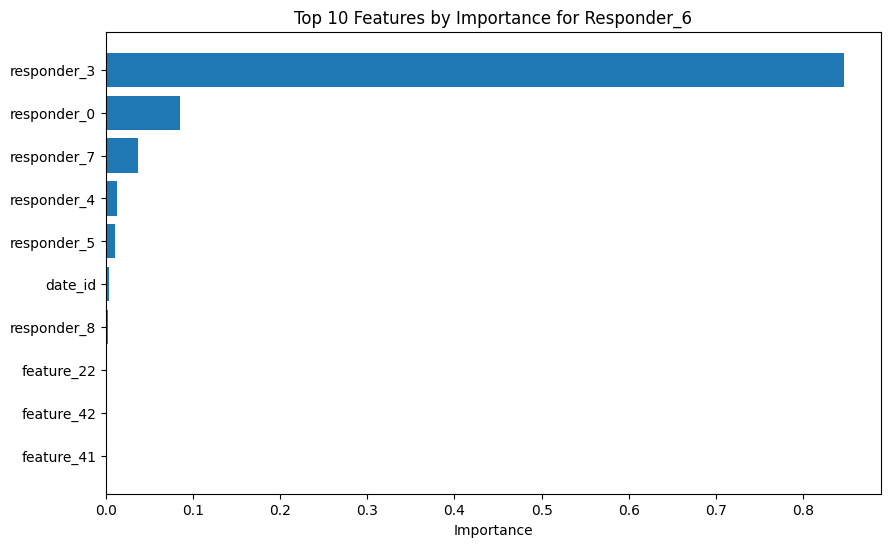

In [22]:
# Question 3: with weights
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
import numpy as np
import matplotlib.pyplot as plt

# Assuming `sample_data` is already loaded and available:
# sample_data = pd.read_csv("your_data.csv")  # or however you load your data

# Step 1: Preprocessing
X = sample_data.drop(columns=['responder_6', 'weight'])
y = sample_data['responder_6']
weights = sample_data['weight']

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)

# Align all datasets using the same indices
sample_indices = X_imputed.sample(n=20_000, random_state=42).index
X_imputed = X_imputed.loc[sample_indices]
y = y.loc[sample_indices]
weights = weights.loc[sample_indices]

# Train-test split
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X_imputed, y, weights, test_size=0.2, random_state=42
)

# Step 2: Define Weighted R² Scoring Function
def weighted_r2(y_true, y_pred, sample_weight):
    y_true_mean = (y_true * sample_weight).sum() / sample_weight.sum()
    numerator = (sample_weight * (y_true - y_pred) ** 2).sum()
    denominator = (sample_weight * (y_true - y_true_mean) ** 2).sum()
    return 1 - numerator / denominator

weighted_r2_scorer = make_scorer(
    lambda y_true, y_pred: weighted_r2(y_true, y_pred, w_test),
    greater_is_better=True
)

# Step 3: Create a Pipeline and Hyperparameter Grid
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('regressor', RandomForestRegressor(random_state=42))
])

param_grid = {
    'regressor__n_estimators': [10],  # Fewer trees for faster training
    'regressor__max_depth': [5],     # Shallower trees
    'regressor__min_samples_split': [2],
    'regressor__min_samples_leaf': [1]
}

# Step 4: Randomized Search for Hyperparameter Tuning

randomized_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=1,
    scoring=weighted_r2_scorer,
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

randomized_search.fit(X_train, y_train)

# Step 5: Evaluate Results
print("Best Hyperparameters:", randomized_search.best_params_)
print("Best Weighted R² Score:", randomized_search.best_score_)

# Feature Importance Analysis
best_model = randomized_search.best_estimator_.named_steps['regressor']
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display the top 10 features
print("Top 10 Features for Responder_6:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["Feature"].head(10), feature_importance["Importance"].head(10))
plt.gca().invert_yaxis()
plt.title("Top 10 Features by Importance for Responder_6")
plt.xlabel("Importance")
plt.show()


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Preprocessing
# Define features (X) and target (y)
X = sample_data.drop(columns=['responder_6'])
y = sample_data['responder_6']

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train-test split (use smaller data for speed)
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed.sample(frac=0.1, random_state=42),  # Use only 10% of data
    y.sample(frac=0.1, random_state=42),
    test_size=0.2,
    random_state=42
)

# Step 2: Define Weighted R² Scoring Function
def weighted_r2(y_true, y_pred, sample_weight=None):
    if sample_weight is None:
        sample_weight = np.ones_like(y_true)
    y_true_mean = (y_true * sample_weight).sum() / sample_weight.sum()
    numerator = ((sample_weight * (y_true - y_pred) ** 2).sum())
    denominator = ((sample_weight * (y_true - y_true_mean) ** 2).sum())
    return 1 - numerator / denominator

weighted_r2_scorer = make_scorer(
    lambda y_true, y_pred: weighted_r2(y_true, y_pred),
    greater_is_better=True
)

# Step 3: Create a Pipeline and Hyperparameter Grid
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('regressor', RandomForestRegressor(random_state=42))
])

param_grid = {
    'regressor__n_estimators': [50],
    'regressor__max_depth': [10],
    'regressor__min_samples_split': [2],
    'regressor__min_samples_leaf': [1]
}

# Step 4: Randomized Search for Hyperparameter Tuning
randomized_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=1,  # Only 1 combination for speed
    scoring=weighted_r2_scorer,
    cv=2,  # Use 2-fold cross-validation
    n_jobs=-1,
    random_state=42,
    verbose=2
)

randomized_search.fit(X_train, y_train)

# Step 5: Evaluate Results
print("Best Hyperparameters:", randomized_search.best_params_)
print("Best Weighted R² Score:", randomized_search.best_score_)

# Feature Importance Analysis
best_model = randomized_search.best_estimator_.named_steps['regressor']
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display the top 10 features
print("Top 10 Features by Importance:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["Feature"].head(10), feature_importance["Importance"].head(10))
plt.gca().invert_yaxis()
plt.title("Top 10 Features by Importance for Responder_6")
plt.xlabel("Importance")
plt.show()




### Step 4:  Present your findings

In this step, you can begin to report your findings.  What did you learn from the data and how do your findings help answer your research question?

This includes following all best practices for presenting your findings that you learnt during the mini-project. The report should be easy to read and important points and explanations clearly highlighted.

__Remember:__ Rarely will a single data analysis conclusively answer a research question.  Here, you need to identify possible limitations.  For example, are your results limited to a certain area, city, or country?  Are you making assumptions about the data which may, or may not, be valid (e.g., that students in one term are equally qualified as students in another)?  Document these limitations in a few paragraphs.


#EXPAND THIS SECTION TO PRESENT YOUR FINDINGS
This project has been a valuable learning experience in tackling real-world data science challenges, particularly with large financial datasets. One of the key takeaways was understanding how to effectively handle large datasets, which involved optimizing computational processes such as sampling, reducing feature space, and efficiently handling missing data. These strategies allowed me to focus on the most relevant parts of the dataset while maintaining the integrity of the analysis.

Another critical skill I developed was the importance of thoroughly inspecting datasets before diving into the modeling process. This included identifying missing values, understanding the significance of specific columns like weights, and ensuring that the dataset was preprocessed in a way that aligned with the goals of the analysis. Having a clear plan and workflow before starting saved time and improved the quality of my results.

Working with financial data provided me with unique insights into how external factors, such as economic events or market trends, can influence data patterns. This contextual understanding helped me approach the project with a broader perspective, connecting data science techniques to real-world phenomena.

Finally, this project significantly improved my ability to complete machine learning projects from start to finish. I learned how to define clear objectives, design workflows, implement algorithms like Random Forests, and evaluate models using metrics such as weighted R². These skills have strengthened my foundation as an entry-level data science graduate student and have prepared me for future projects that involve complex, real-world datasets.

# 2. Video

Make a video where you go over each part of the report speaking about the steps you undertook and explaining your work, reasonings, insights and highlighting the important points of the project. You do not need to explain the lines of code (unless you feel it is required).

1. The video should be more than 5 minutes and strictly less than 10 minutes.
2. Both audio and video is required.
3. You can use the zoom to record the video. Start a meeting, start video, start recording and share screen.
4. Make sure your audio is clear before uploading the video to the gradescope.


Additionally (and this is important), ensure you follow the format the video submission. If one of these criteria is missing, we will not grade the video.
* Show some form of ID at the start of the video so we know who you are.
* Show your code in the video by screensharing.
* Show your face in the video.


https://drive.google.com/file/d/1NWJ2HNpIV4iqg3Ov9UzjZA5ibb-lBg8X/view?usp=drive_link